In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot

In [12]:
df=pd.read_csv('C:\\Users\\kkdk0001\\Downloads\\ToyotaCorolla.csv',encoding='latin1')
df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [13]:
df=df.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [14]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [15]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


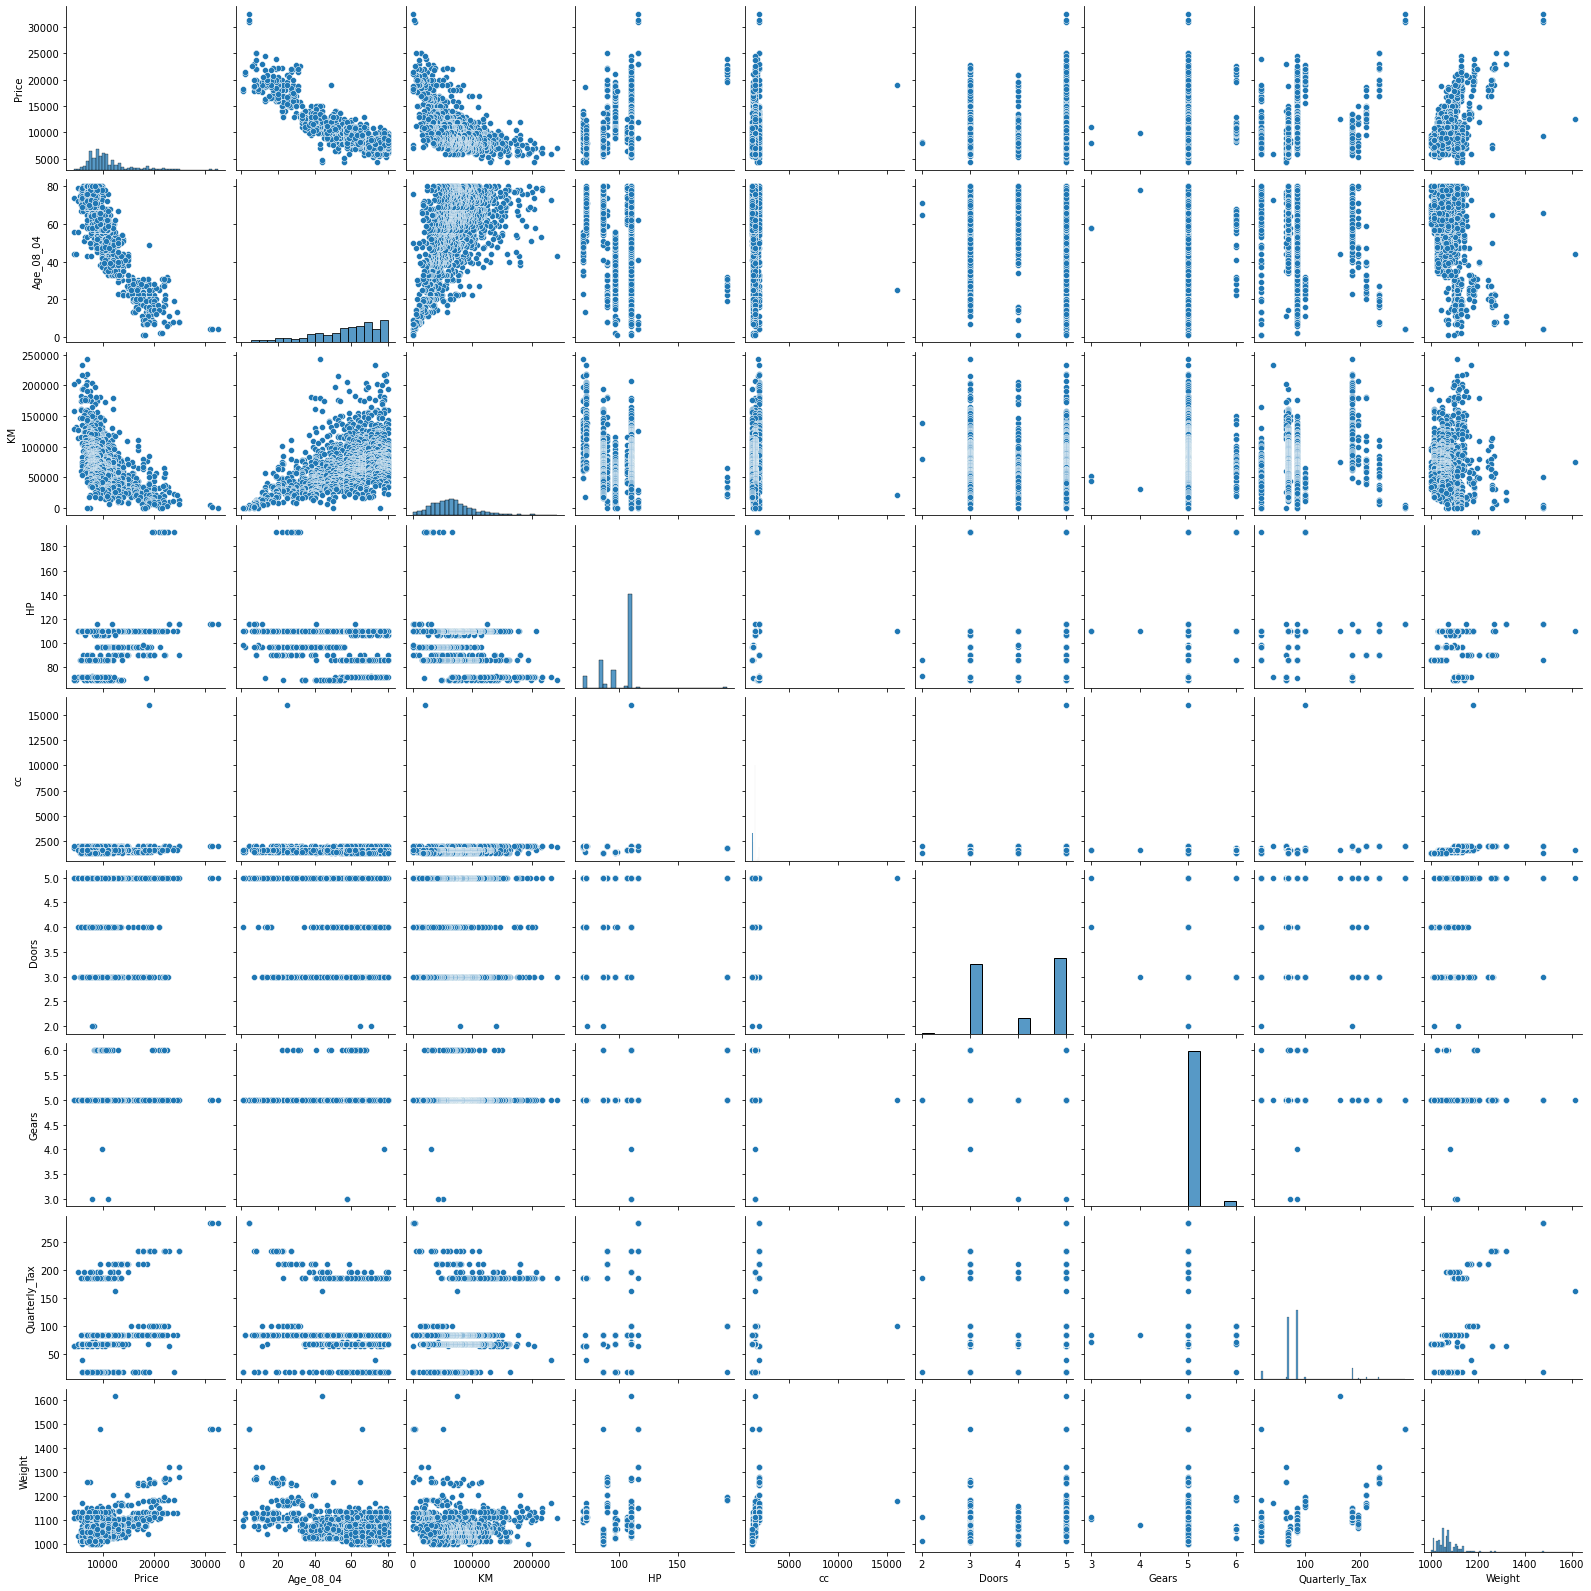

In [21]:
sns.pairplot(df)

In [24]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [26]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [29]:
model.tvalues

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64

In [31]:
model.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

In [33]:
model.rsquared

0.8637627463428192

In [59]:
modelt=smf.ols('Price~Doors',data=df).fit()
modelt.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [58]:
modelt2=smf.ols('Price~cc',data=df).fit()
modelt2.pvalues

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

In [64]:
rsq_cc=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_cc=1/(1-rsq_cc)
print(rsq_cc)
print(vif_cc)

0.14081521776271877
1.1638939849423797


In [68]:
rsq_Doors=smf.ols('Doors~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight+cc',data=df).fit().rsquared
vif_Doors=1/(1-rsq_Doors)
print(rsq_Doors)
print(vif_Doors)

1.0
inf


C:\Users\kkdk0001\AppData\Local\Temp/ipykernel_25376/254095745.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  vif_Doors=1/(1-rsq_Doors)


In [ ]:
# we will drop door and cc as they are more than alpha (0.05) which is not significant and even the VIF is not more than 20

In [74]:
df1=df.loc[:,["Price","Age_08_04","KM","HP","Gears","Quarterly_Tax","Weight"]]

In [75]:
model2=smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=df1).fit()

In [76]:
model2.params

Intercept       -5478.477784
Age_08_04        -121.699859
KM                 -0.020938
HP                 31.326890
Gears             598.965326
Quarterly_Tax       3.737135
Weight             16.725110
dtype: float64

In [77]:
model2.tvalues

Intercept        -3.889413
Age_08_04       -46.534356
KM              -16.769177
HP               11.191158
Gears             3.096372
Quarterly_Tax     2.882923
Weight           16.392941
dtype: float64

In [78]:
model2.pvalues

Intercept         1.051026e-04
Age_08_04        1.605662e-288
KM                9.383988e-58
HP                6.284770e-28
Gears             1.997142e-03
Quarterly_Tax     3.998997e-03
Weight            1.789355e-55
dtype: float64

In [79]:
model2.rsquared,model2.rsquared_adj

(0.8635902024630112, 0.8630174531381534)

In [81]:
#Residual Analysis

In [83]:
#Normality Test QQ Plot

In [86]:
import statsmodels.api as sm

C:\Users\kkdk0001\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


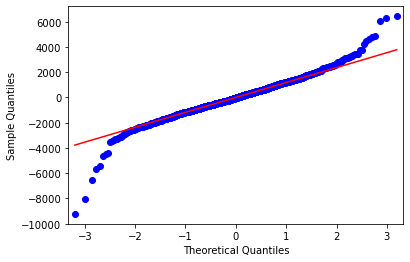

In [88]:
qqplot=sm.qqplot(model2.resid,line='q')

In [90]:
list(np.where(model2.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [92]:
#Residual Plot for Homoscedasticity

In [97]:
def get_standardized_values (vals):
    return(vals-vals.mean())/vals.std()

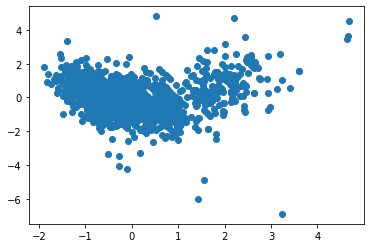

In [99]:
plt.scatter(get_standardized_values(model2.fittedvalues),get_standardized_values(model2.resid))

In [101]:
# Residual v/s Regressor Plot 

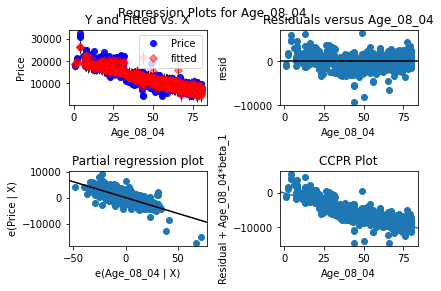

In [104]:
fig=sm.graphics.plot_regress_exog(model2,'Age_08_04')

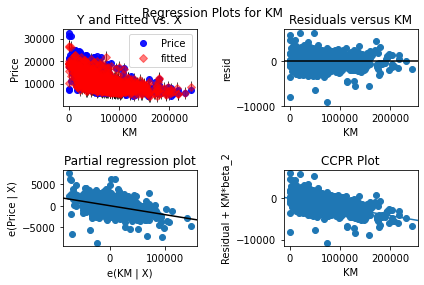

In [107]:
fig=sm.graphics.plot_regress_exog(model2,'KM')

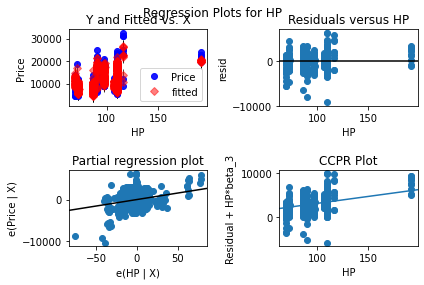

In [109]:
fig=sm.graphics.plot_regress_exog(model2,'HP')

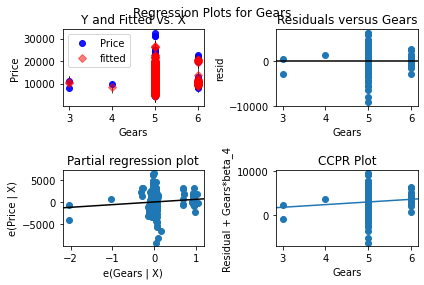

In [111]:
fig=sm.graphics.plot_regress_exog(model2,'Gears')

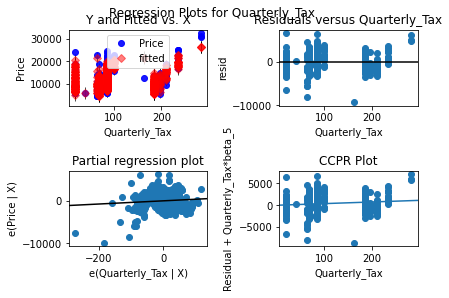

In [114]:
fig=sm.graphics.plot_regress_exog(model2,'Quarterly_Tax')

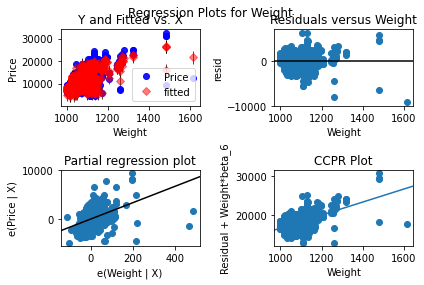

In [116]:
fig=sm.graphics.plot_regress_exog(model2,'Weight')

In [118]:
# Cooks Distance - Model Deletion 

In [125]:
model2_influence=model2.get_influence()
(c,_)=model2_influence.cooks_distance
c

array([7.97603386e-03, 4.30982438e-03, 6.05548296e-03, ...,
       1.36799924e-06, 8.41297074e-04, 1.37842881e-02])

<StemContainer object of 3 artists>

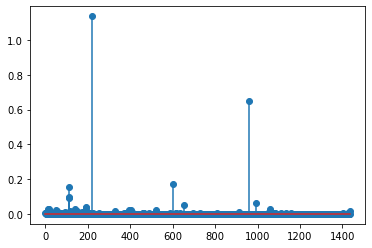

In [130]:
plt.stem(np.arange(len(df1)),np.round(c,3))

In [132]:
np.argmax(c),np.max(c)

(221, 1.13654738231963)

In [136]:
df1[df1.index.isin([221])]

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
221,12450,44,74172,110,5,163,1615


In [138]:
df1.head(2)

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165


In [145]:
dfN=df1.drop(df1.index[221]).reset_index()
dfN.iloc[220]

index              220
Price            11950
Age_08_04           43
KM               74285
HP                 110
Gears                5
Quarterly_Tax       85
Weight            1075
Name: 220, dtype: int64

In [147]:
dfN

,index,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,5,210,1165
1,1,13750,23,72937,90,5,210,1165
2,2,13950,24,41711,90,5,210,1165
3,3,14950,26,48000,90,5,210,1165
4,4,13750,30,38500,90,5,210,1170
...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,5,69,1025
1431,1432,10845,72,19000,86,5,69,1015
1432,1433,8500,71,17016,86,5,69,1015
1433,1434,7250,70,16916,86,5,69,1015


In [149]:
modelF=smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=dfN).fit()

In [152]:
modelF.rsquared

0.8687396213904708

In [154]:
modelF_influence=modelF.get_influence()
(c,_)=modelF_influence.cooks_distance

<StemContainer object of 3 artists>

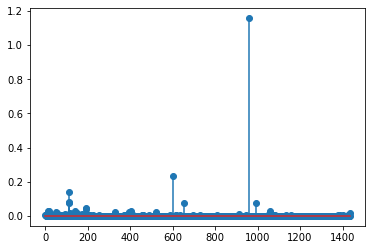

In [158]:
plt.stem(np.arange(len(df1)-1),np.round(c,3))

In [160]:
np.argmax(c),np.max(c)

(959, 1.15554830596423)

In [193]:
dfN=dfN.drop(dfN.index[959]).reset_index()
dfN.iloc[959]

level_0            960
index              961
Price             8750
Age_08_04           59
KM               50469
HP                 110
Gears                5
Quarterly_Tax       85
Weight            1070
Name: 959, dtype: int64

In [194]:
modelF1=smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=dfN).fit()

In [195]:
modelF1.rsquared

0.866366885998009

In [196]:
modelF1_influence=modelF1.get_influence()
(c,_)=modelF1_influence.cooks_distance

<StemContainer object of 3 artists>

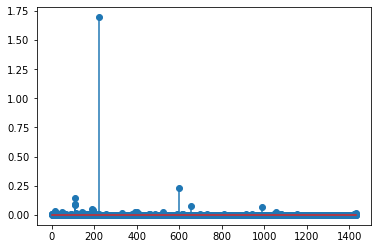

In [198]:
plt.stem(np.arange(len(df1)-2),np.round(c,3))

In [204]:
np.argmax(c),np.max(c)

(221, 1.6952756560766438)

In [205]:
dfN

,level_0,index,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,0,0,13500,23,46986,90,5,210,1165
1,1,1,13750,23,72937,90,5,210,1165
2,2,2,13950,24,41711,90,5,210,1165
3,3,3,14950,26,48000,90,5,210,1165
4,4,4,13750,30,38500,90,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,1430,1431,7500,69,20544,86,5,69,1025
1430,1431,1432,10845,72,19000,86,5,69,1015
1431,1432,1433,8500,71,17016,86,5,69,1015
1432,1433,1434,7250,70,16916,86,5,69,1015


In [213]:
dfNN=dfN.drop(dfN.index[221])

In [233]:
modelF2=smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=dfNN).fit()

<StemContainer object of 3 artists>

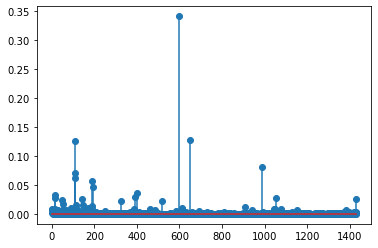

In [243]:
modelF2_influence=modelF2.get_influence()
(c,_)=modelF2_influence.cooks_distance
plt.stem(np.arange(len(dfNN)),np.round(c,3))

In [244]:
np.argmax(c),np.max(c)

(598, 0.34141574627389476)

In [246]:
Final_model=smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=dfNN).fit()

In [250]:
Final_model.rsquared


0.8731547845983756

In [252]:
dfNN.head(2)

,level_0,index,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,0,0,13500,23,46986,90,5,210,1165
1,1,1,13750,23,72937,90,5,210,1165


In [254]:
dfNN.iloc[:,3:9]

,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,23,46986,90,5,210,1165
1,23,72937,90,5,210,1165
2,24,41711,90,5,210,1165
3,26,48000,90,5,210,1165
4,30,38500,90,5,210,1170
...,...,...,...,...,...,...
1429,69,20544,86,5,69,1025
1430,72,19000,86,5,69,1015
1431,71,17016,86,5,69,1015
1432,70,16916,86,5,69,1015


In [257]:
dfNN["Predicted Price"]=round(Final_model.predict(dfNN.iloc[:,3:9]))
dfNN

,level_0,index,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight,Predicted Price
0,0,0,13500,23,46986,90,5,210,1165,16688.0
1,1,1,13750,23,72937,90,5,210,1165,16131.0
2,2,2,13950,24,41711,90,5,210,1165,16686.0
3,3,3,14950,26,48000,90,5,210,1165,16319.0
4,4,4,13750,30,38500,90,5,210,1170,16173.0
...,...,...,...,...,...,...,...,...,...,...
1429,1430,1431,7500,69,20544,86,5,69,1025,8783.0
1430,1431,1432,10845,72,19000,86,5,69,1015,8240.0
1431,1432,1433,8500,71,17016,86,5,69,1015,8399.0
1432,1433,1434,7250,70,16916,86,5,69,1015,8517.0
